In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2,style='darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#change display into using full screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
#import .csv file
data= pd.read_csv("D:\Python\My Project\Data files\datafb.csv")

# 1. Data Exploration & Cleaning

### 1. Have a first look at data

In [6]:
data.head()

,Campaign Name,Ad Set Name,Ad Name,Age,Gender,Campaign Name.1,Result Type,Results,Reach,Impressions,...,Landing Page Views,Link Clicks,Cost per Landing Page View,Result Rate,Clicks (All),CPC (All),CTR (All),"CPM (Cost per 1,000 Impressions)",Reporting Starts,Reporting Ends
0,NGK- Web traffic- Admission campaign 2020,Aeronautical-students,Aeronautical-students,18-24,male,NGK- Web traffic- Admission campaign 2020,Link Clicks,83.0,34944,51177,...,21.0,83.0,23.923449,0.162182,113,4.445951,0.220802,9.816762,01-06-2020,14-06-2020
1,NGK- Web traffic- Admission campaign 2020,Law-students,Law-students,18-24,male,NGK- Web traffic- Admission campaign 2020,Link Clicks,297.0,20547,35309,...,38.0,297.0,12.832761,0.841145,291,1.675756,0.824152,13.810783,01-06-2020,14-06-2020
2,NGK- Web traffic- Admission campaign 2020,Btech-students,Btech-students,18-24,male,NGK- Web traffic- Admission campaign 2020,Link Clicks,239.0,15020,28530,...,26.0,239.0,17.165682,0.837715,223,2.001380,0.781633,15.643454,01-06-2020,14-06-2020
3,NGK- Web traffic- Admission campaign 2020,Mechatronics-students,Mechatronics-students,18-24,male,NGK- Web traffic- Admission campaign 2020,Link Clicks,251.0,18680,32974,...,30.0,251.0,14.115176,0.761206,239,1.771779,0.724813,12.842096,01-06-2020,14-06-2020
4,NGK- Web traffic- Admission campaign 2020,AME-students,AME-students,18-24,male,NGK- Web traffic- Admission campaign 2020,Link Clicks,62.0,20210,30038,...,16.0,62.0,25.864971,0.206405,83,4.986019,0.276317,13.777200,01-06-2020,14-06-2020


In [7]:
df.shape

(152, 25)

In [8]:
data.isnull().sum()

Campaign Name                         0
Ad Set Name                           0
Ad Name                               0
Age                                   0
Gender                                0
Campaign Name.1                       0
Result Type                          46
Results                              46
Reach                                 0
Impressions                           0
Cost per Result                      46
Amount Spent (INR)                    0
Frequency                             0
Unique Link Clicks                   46
Website Purchases                   152
Landing Page Views                   53
Link Clicks                          46
Cost per Landing Page View           53
Result Rate                          46
Clicks (All)                          0
CPC (All)                            43
CTR (All)                             0
CPM (Cost per 1,000 Impressions)      0
Reporting Starts                      0
Reporting Ends                        0


In [9]:
#Consider only those records where amount spent > 0
data = data[(data['Amount Spent (INR)'] > 0)]

In [10]:
data.shape

(151, 25)

### 2. Drop Columns that are extra

In [11]:
#We see that Reporting Starts and Reporting Ends are additional columns which we don't require. So we drop them
data.drop(['Reporting Ends','Reporting Starts',"Campaign Name.1","Website Purchases","Unique Link Clicks","Landing Page Views","Link Clicks","Cost per Landing Page View","Result Rate"],axis=1, inplace = True)

In [29]:
data.drop(["Result Type"],axis=1, inplace = True)

In [12]:
#look at the data again
data.head()

,Campaign Name,Ad Set Name,Ad Name,Age,Gender,Result Type,Results,Reach,Impressions,Cost per Result,Amount Spent (INR),Frequency,Clicks (All),CPC (All),CTR (All),"CPM (Cost per 1,000 Impressions)"
0,NGK- Web traffic- Admission campaign 2020,Aeronautical-students,Aeronautical-students,18-24,male,Link Clicks,83.0,34944,51177,6.052921,502.392436,1.464543,113,4.445951,0.220802,9.816762
1,NGK- Web traffic- Admission campaign 2020,Law-students,Law-students,18-24,male,Link Clicks,297.0,20547,35309,1.641902,487.644929,1.718450,291,1.675756,0.824152,13.810783
2,NGK- Web traffic- Admission campaign 2020,Btech-students,Btech-students,18-24,male,Link Clicks,239.0,15020,28530,1.867396,446.307743,1.899467,223,2.001380,0.781633,15.643454
3,NGK- Web traffic- Admission campaign 2020,Mechatronics-students,Mechatronics-students,18-24,male,Link Clicks,251.0,18680,32974,1.687073,423.455274,1.765203,239,1.771779,0.724813,12.842096
4,NGK- Web traffic- Admission campaign 2020,AME-students,AME-students,18-24,male,Link Clicks,62.0,20210,30038,6.674831,413.839542,1.486294,83,4.986019,0.276317,13.777200


In [13]:
#check rows and columns in data
data.shape

(151, 16)

#### So, there are 349 rows and 13 columns in the data

### 3. Deal with Null Values

In [14]:
#let's look if any column has null values
data.isnull().sum()

Campaign Name                        0
Ad Set Name                          0
Ad Name                              0
Age                                  0
Gender                               0
Result Type                         45
Results                             45
Reach                                0
Impressions                          0
Cost per Result                     45
Amount Spent (INR)                   0
Frequency                            0
Clicks (All)                         0
CPC (All)                           42
CTR (All)                            0
CPM (Cost per 1,000 Impressions)     0
dtype: int64

#### From this we can infer that some columns have Null values (basically blank). Let's look at them:
**1. Results & Result Type:** This happened when there was no conversion (Result).

**2. Result rate, Cost per result:** As both these metrics depend on Result, so these are also blank. 

This was bound to happen because not every single day and every ad got a result (conversion). **So it is safe to replace all nulls in Results and Result rate column with 0.**

In [15]:
#Fill all blanks in Results with 0
data['Results'] = data['Results'].fillna(0)
data['CPC (All)'] = data['CPC (All)'].fillna(0)
data['Cost per Result'] = data['Cost per Result'].fillna(0)


In [16]:
#check how many nulls are still there 
data.isnull().sum()

Campaign Name                        0
Ad Set Name                          0
Ad Name                              0
Age                                  0
Gender                               0
Result Type                         45
Results                              0
Reach                                0
Impressions                          0
Cost per Result                      0
Amount Spent (INR)                   0
Frequency                            0
Clicks (All)                         0
CPC (All)                            0
CTR (All)                            0
CPM (Cost per 1,000 Impressions)     0
dtype: int64

#### Voila! Results & Result rate column has no nulls now. Let's see what column Results Type is all about. 

In [17]:
data['Result Type'].value_counts()

Link Clicks    106
Name: Result Type, dtype: int64

So we infer that 'Result Type' is basically the type of conversion event taking place. It can be either Page Like, Post Like, On-Facebook Lead, Custom Conversion etc. **Since, we are analysing just one campaign here, we can drop this column as it has same meaning throughout data set.**

If we were analysing multiple campaigns, with different objectives, then keeping this column would have made sense.

In [18]:
#Drop Result Type column from data
data.drop(['Result Type'],axis=1, inplace = True)

In [19]:
#check how many nulls are still there 
data.isnull().sum()

Campaign Name                       0
Ad Set Name                         0
Ad Name                             0
Age                                 0
Gender                              0
Results                             0
Reach                               0
Impressions                         0
Cost per Result                     0
Amount Spent (INR)                  0
Frequency                           0
Clicks (All)                        0
CPC (All)                           0
CTR (All)                           0
CPM (Cost per 1,000 Impressions)    0
dtype: int64

Now we need to deal with **Cost per result**.
The cases where CPA is Null means that there was no conversion. So ideally, in these cases the CPA should be very high (in case a conversion actually happened).

#### So, let's leave this column as it is because we can't assign any value for records where no conversion happened.

In [20]:
#Have a look at data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Campaign Name                     151 non-null    object 
 1   Ad Set Name                       151 non-null    object 
 2   Ad Name                           151 non-null    object 
 3   Age                               151 non-null    object 
 4   Gender                            151 non-null    object 
 5   Results                           151 non-null    float64
 6   Reach                             151 non-null    int64  
 7   Impressions                       151 non-null    int64  
 8   Cost per Result                   151 non-null    float64
 9   Amount Spent (INR)                151 non-null    float64
 10  Frequency                         151 non-null    float64
 11  Clicks (All)                      151 non-null    int64  
 12  CPC (All

# 2. Feature Engineering

Make new and better features from using the current available features

### 1. We can divide Frequency in buckets

In [21]:
data['Frequency'] = data['Frequency'].apply(lambda x:'1 to 2' if x<2
                                               else '2 to 3' if x>=2 and x<3 
                                               else '3 to 4' if x>=3 and x<4
                                               else '4 to 5' if x>=4 and x<5
                                               else 'More than 5')

In [22]:
data.head()

,Campaign Name,Ad Set Name,Ad Name,Age,Gender,Results,Reach,Impressions,Cost per Result,Amount Spent (INR),Frequency,Clicks (All),CPC (All),CTR (All),"CPM (Cost per 1,000 Impressions)"
0,NGK- Web traffic- Admission campaign 2020,Aeronautical-students,Aeronautical-students,18-24,male,83.0,34944,51177,6.052921,502.392436,1 to 2,113,4.445951,0.220802,9.816762
1,NGK- Web traffic- Admission campaign 2020,Law-students,Law-students,18-24,male,297.0,20547,35309,1.641902,487.644929,1 to 2,291,1.675756,0.824152,13.810783
2,NGK- Web traffic- Admission campaign 2020,Btech-students,Btech-students,18-24,male,239.0,15020,28530,1.867396,446.307743,1 to 2,223,2.001380,0.781633,15.643454
3,NGK- Web traffic- Admission campaign 2020,Mechatronics-students,Mechatronics-students,18-24,male,251.0,18680,32974,1.687073,423.455274,1 to 2,239,1.771779,0.724813,12.842096
4,NGK- Web traffic- Admission campaign 2020,AME-students,AME-students,18-24,male,62.0,20210,30038,6.674831,413.839542,1 to 2,83,4.986019,0.276317,13.777200


### 2. Split Ad name into Ad Format and Ad Headline

In [23]:
data["Adset_Name"] = data['Ad Set Name']

In [24]:
data.head()

,Campaign Name,Ad Set Name,Ad Name,Age,Gender,Results,Reach,Impressions,Cost per Result,Amount Spent (INR),Frequency,Clicks (All),CPC (All),CTR (All),"CPM (Cost per 1,000 Impressions)",Adset_Name
0,NGK- Web traffic- Admission campaign 2020,Aeronautical-students,Aeronautical-students,18-24,male,83.0,34944,51177,6.052921,502.392436,1 to 2,113,4.445951,0.220802,9.816762,Aeronautical-students
1,NGK- Web traffic- Admission campaign 2020,Law-students,Law-students,18-24,male,297.0,20547,35309,1.641902,487.644929,1 to 2,291,1.675756,0.824152,13.810783,Law-students
2,NGK- Web traffic- Admission campaign 2020,Btech-students,Btech-students,18-24,male,239.0,15020,28530,1.867396,446.307743,1 to 2,223,2.001380,0.781633,15.643454,Btech-students
3,NGK- Web traffic- Admission campaign 2020,Mechatronics-students,Mechatronics-students,18-24,male,251.0,18680,32974,1.687073,423.455274,1 to 2,239,1.771779,0.724813,12.842096,Mechatronics-students
4,NGK- Web traffic- Admission campaign 2020,AME-students,AME-students,18-24,male,62.0,20210,30038,6.674831,413.839542,1 to 2,83,4.986019,0.276317,13.777200,AME-students


In [25]:
data[['Dept','Target']] = data.Adset_Name.str.split("-",expand=True)

In [41]:
data.head()

,Campaign Name,Ad Set Name,Ad Name,Age,Gender,Results,Reach,Impressions,Cost per Result,Amount Spent (INR),Frequency,Clicks (All),CPC (All),CTR (All),"CPM (Cost per 1,000 Impressions)",Adset_Name,Dept,Target
0,NGK- Web traffic- Admission campaign 2020,Aeronautical-students,Aeronautical-students,18-24,male,83.0,34944,51177,6.052921,502.392436,1 to 2,113,4.445951,0.220802,9.816762,Aeronautical-students,Aeronautical,students
1,NGK- Web traffic- Admission campaign 2020,Law-students,Law-students,18-24,male,297.0,20547,35309,1.641902,487.644929,1 to 2,291,1.675756,0.824152,13.810783,Law-students,Law,students
2,NGK- Web traffic- Admission campaign 2020,Btech-students,Btech-students,18-24,male,239.0,15020,28530,1.867396,446.307743,1 to 2,223,2.001380,0.781633,15.643454,Btech-students,Btech,students
3,NGK- Web traffic- Admission campaign 2020,Mechatronics-students,Mechatronics-students,18-24,male,251.0,18680,32974,1.687073,423.455274,1 to 2,239,1.771779,0.724813,12.842096,Mechatronics-students,Mechatronics,students
4,NGK- Web traffic- Admission campaign 2020,AME-students,AME-students,18-24,male,62.0,20210,30038,6.674831,413.839542,1 to 2,83,4.986019,0.276317,13.777200,AME-students,AME,students


In [ ]:
data.drop(['Ad name','Ad_name'],axis=1, inplace = True)

In [ ]:
data.head()

### 3. Remove unknown from Gender

In [26]:
data['Gender'].value_counts()

male       55
female     55
unknown    41
Name: Gender, dtype: int64

In [43]:
data = data[data.Gender != 'unknown']

In [27]:
data['Gender'].value_counts()

male       55
female     55
unknown    41
Name: Gender, dtype: int64

In [28]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Campaign Name                     151 non-null    object 
 1   Ad Set Name                       151 non-null    object 
 2   Ad Name                           151 non-null    object 
 3   Age                               151 non-null    object 
 4   Gender                            151 non-null    object 
 5   Results                           151 non-null    float64
 6   Reach                             151 non-null    int64  
 7   Impressions                       151 non-null    int64  
 8   Cost per Result                   151 non-null    float64
 9   Amount Spent (INR)                151 non-null    float64
 10  Frequency                         151 non-null    object 
 11  Clicks (All)                      151 non-null    int64  
 12  CPC (All

In [29]:
data.to_csv('1. Clean_Data_age_gender.csv',index=False)

## Now our data is clean. Here are our features that we will use for analysis

- **1. Campaign Name** - Name of campaign
- **2. Ad Set Name** - Targeting
- **3. Age** - Age of end user
- **4. Gender** - Gender of end user
- **5. Results** - How many conversions were achieved
- **6. Cost per result** - Average Cost required for 1 conversion
- **7. Amount spent** - How much money was spent on ad campaign
- **8. CTR** - Click Through Rate
- **9. CPM** - Cost per 1000 impressions
- **10. Result Rate** - Conversion Rate
- **11. Frequency** - On an average how many times did one user see the ad
- **12. Ad Format** - Whether the ad crative is **Image/Video/Carousel**
- **13. Ad Gender** - Gender of the person on creative
- **14. Ad Headline** - The headline used in ad

So, our target variable here is **Results** and we will analyse the effect of other variable on our target variable.

# 4. Relationship Visualization

## 1. Effect of Ad Headline + Age + Gender on Engagement & Conversion

### Generic View

In [30]:
data = data.sort_values(by=['Age']) 

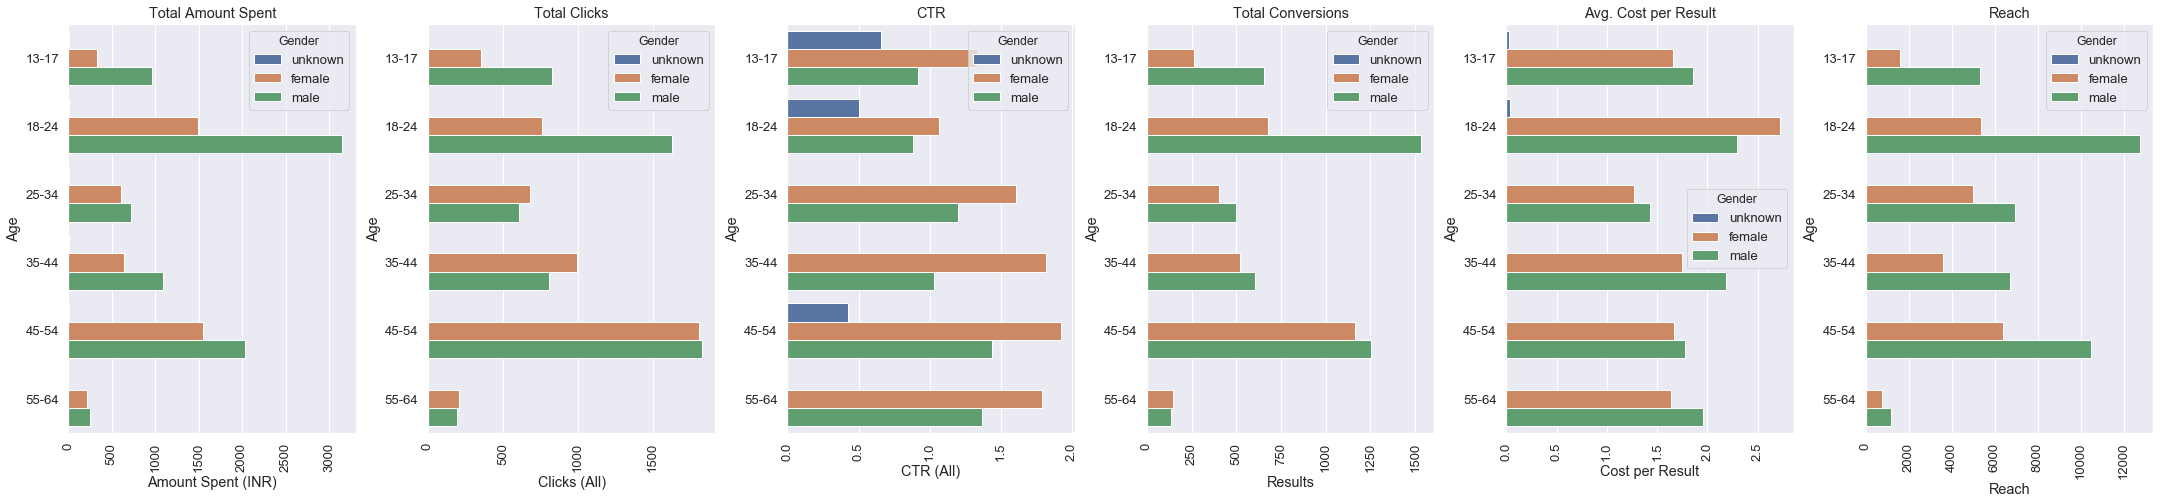

In [31]:
# increase figure size 
plt.figure(figsize=(30, 7))

# subplot 1
plt.subplot(1, 6, 1)
sns.barplot(y='Age', x='Amount Spent (INR)',hue='Gender', data=data, estimator=np.sum,ci=None)
plt.title("Total Amount Spent")
plt.xticks(rotation=90)


# subplot 2
plt.subplot(1, 6, 2)
sns.barplot(y='Age', x='Clicks (All)', hue='Gender', data=data, estimator=np.sum,ci=None)
plt.title("Total Clicks")
plt.xticks(rotation=90)

# subplot 3
plt.subplot(1, 6, 3)
sns.barplot(y='Age', x='CTR (All)', hue='Gender', data=data, estimator=np.mean,ci=None)
plt.title("CTR")
plt.xticks(rotation=90)

# subplot 4
plt.subplot(1, 6, 4)
sns.barplot(y='Age', x='Results', hue='Gender', data=data, estimator=np.sum,ci=None)
plt.title("Total Conversions")
plt.xticks(rotation=90)

# subplot 5
plt.subplot(1, 6, 5)
sns.barplot(y='Age', x='Cost per Result', hue='Gender', data=data, estimator=np.mean,ci=None)
plt.title("Avg. Cost per Result")
plt.xticks(rotation=90)

# subplot 6
plt.subplot(1,6, 6)
sns.barplot(y='Age', x='Reach', hue='Gender', data=data, estimator=np.mean,ci=None)
plt.title("Reach")
plt.xticks(rotation=90)


plt.tight_layout(pad=0.7)
plt.show()

### Let's Look at a Granular View

Text(0.5, 0.98, 'Avg. Click Through Rate (CTR) of Each Ad')

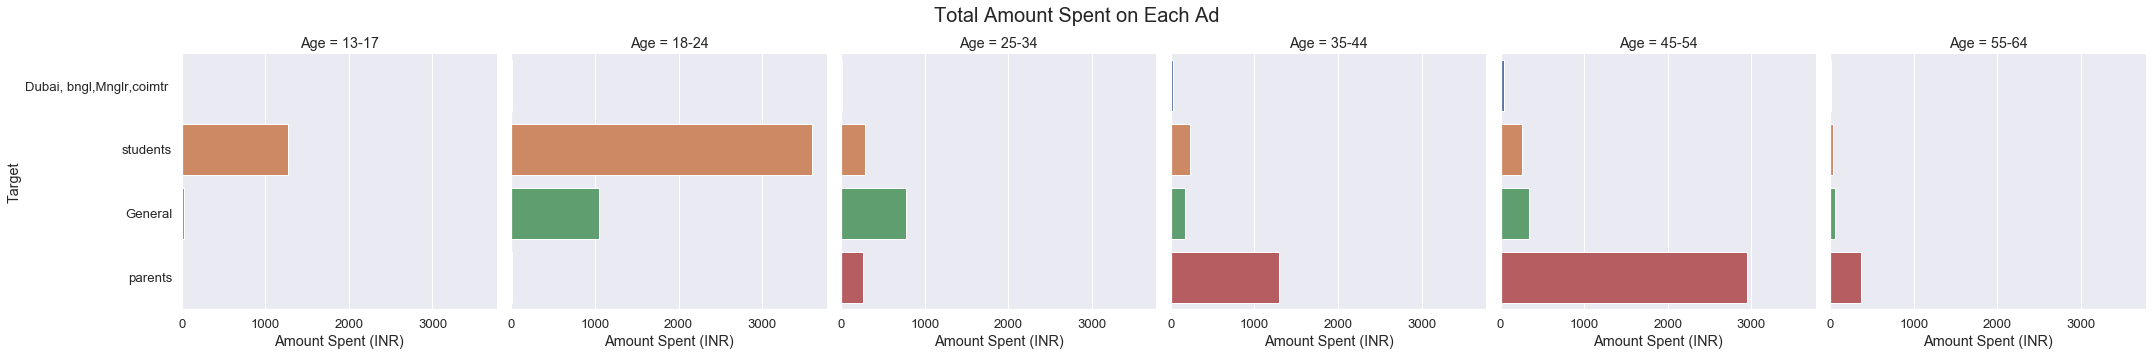

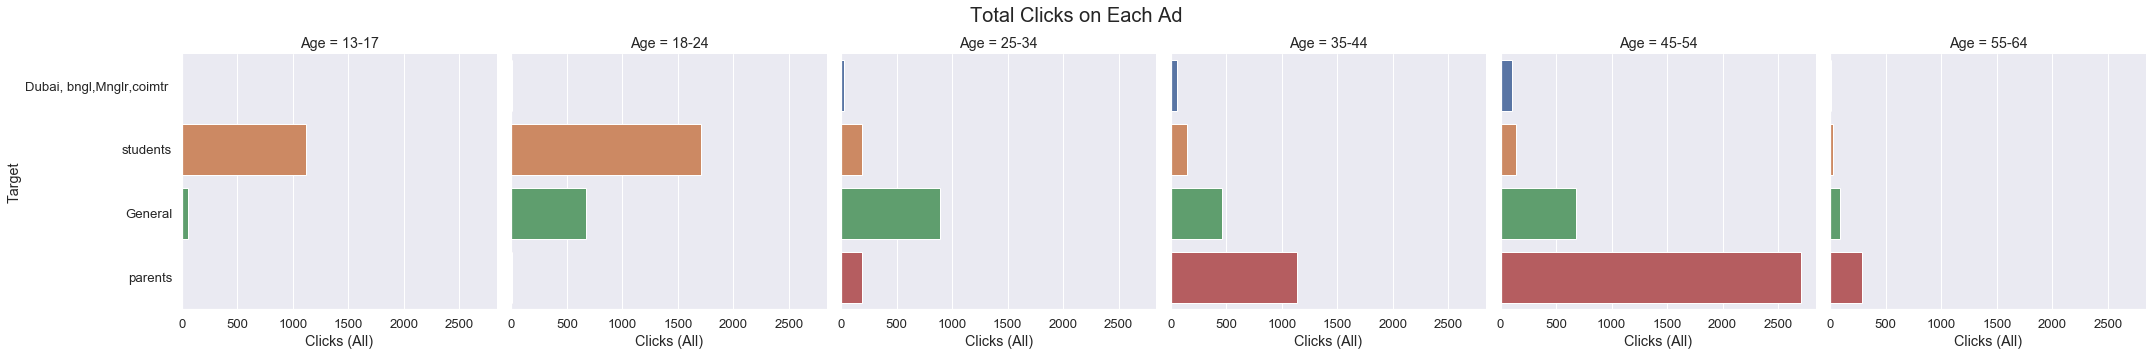

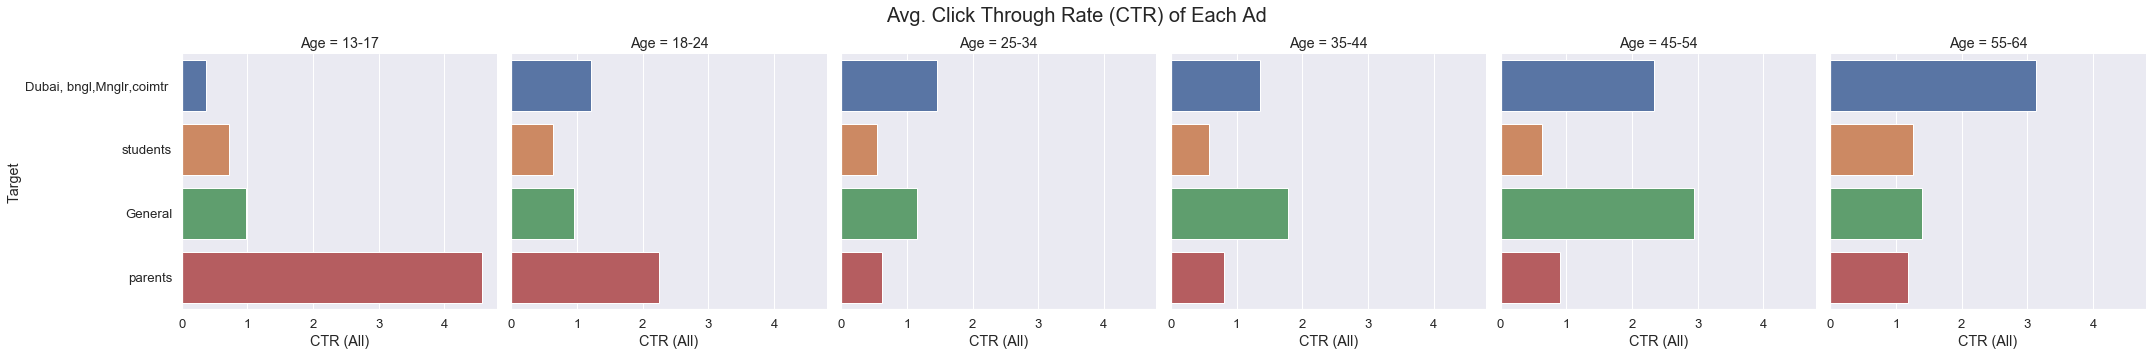

In [33]:
sns.catplot(y='Target',x='Amount Spent (INR)',col='Age',data=data,kind='bar', estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Amount Spent on Each Ad',fontsize=20)

sns.catplot(y='Target',x='Clicks (All)',col='Age',data=data,kind='bar', estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Clicks on Each Ad',fontsize=20)

sns.catplot(y='Target',x='CTR (All)',col='Age',data=data,kind='bar', estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Click Through Rate (CTR) of Each Ad',fontsize=20)

Text(0.5, 0.98, 'Avg. Click Through Rate (CTR) of Each Ad')

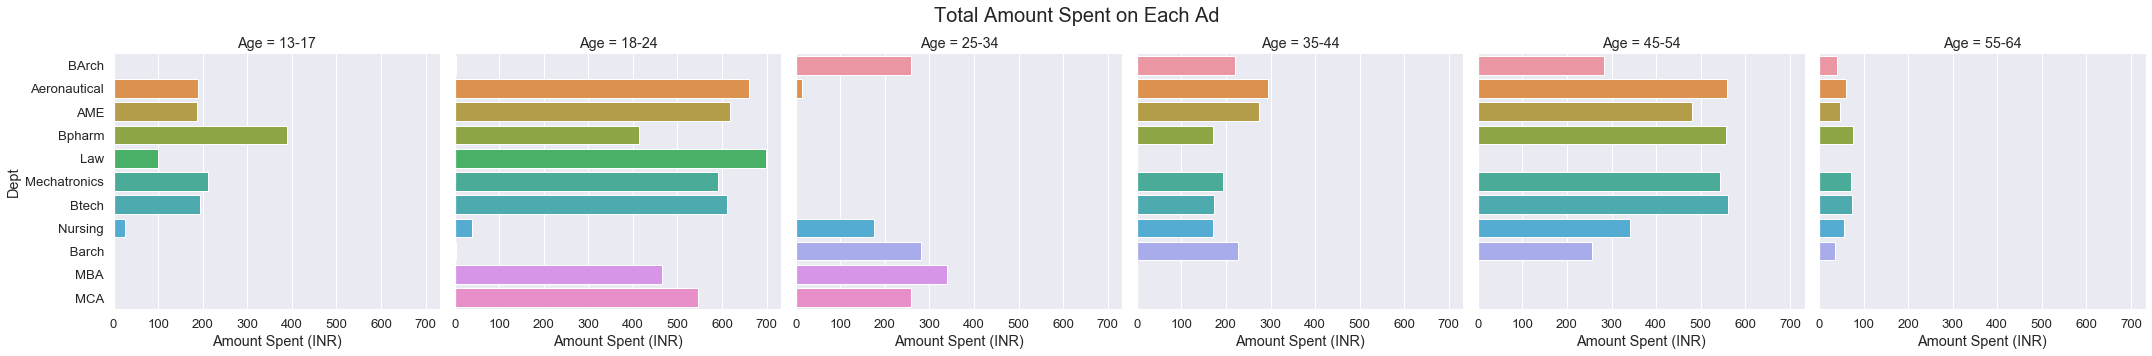

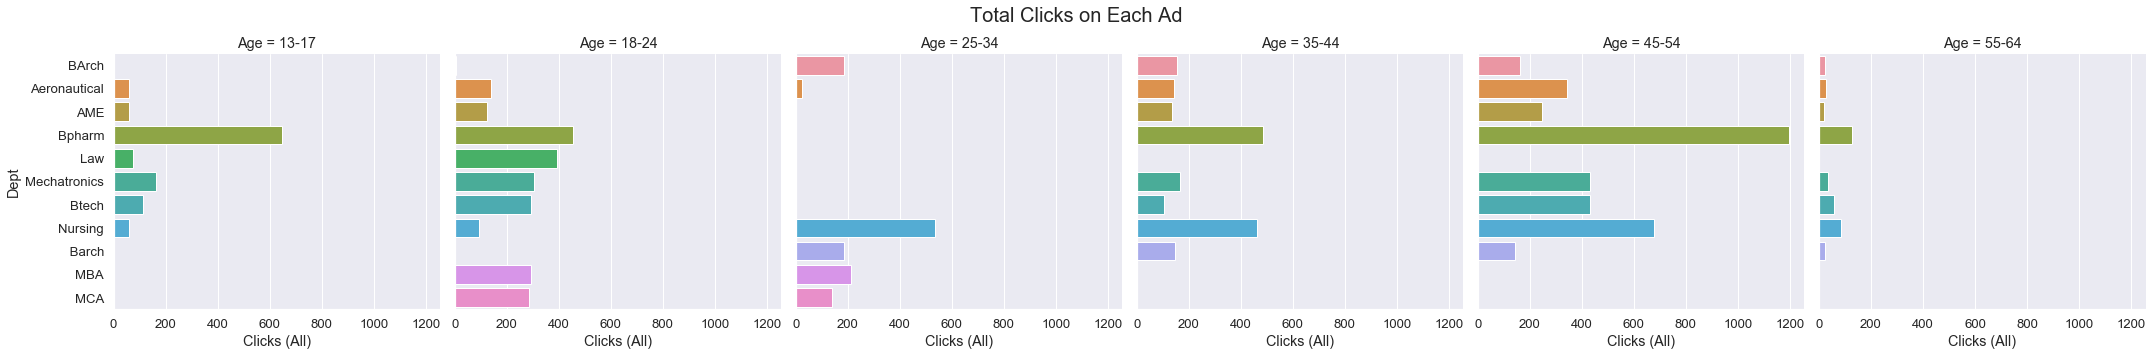

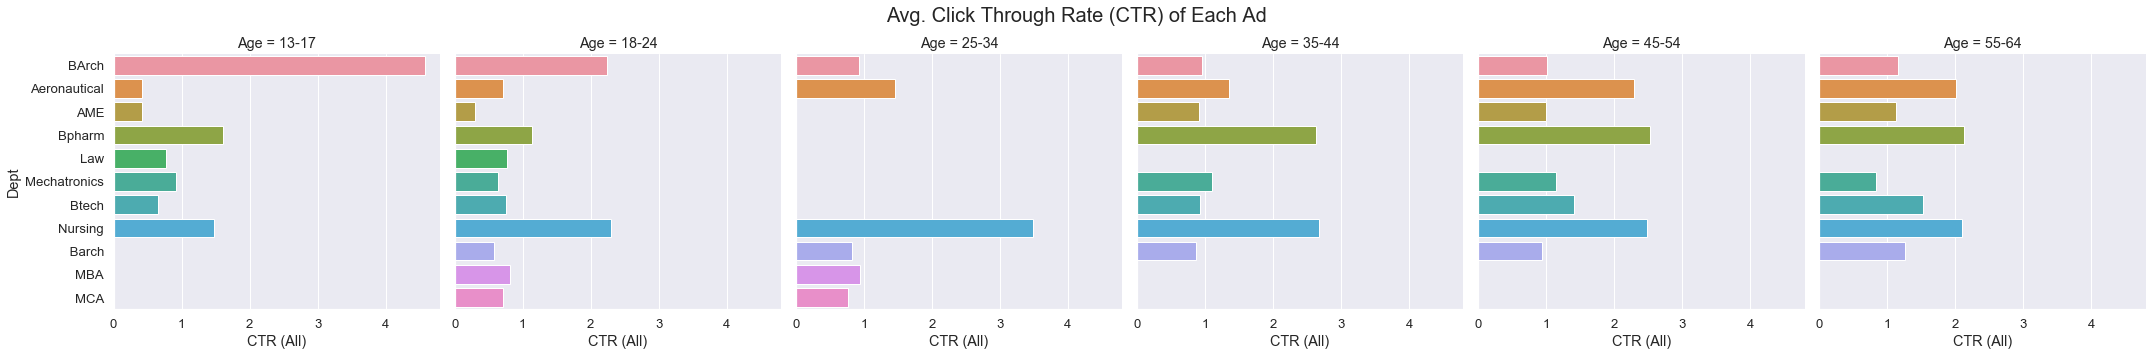

In [52]:
sns.catplot(y='Dept',x='Amount Spent (INR)',col='Age',data=data,kind='bar', estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Amount Spent on Each Ad',fontsize=20)

sns.catplot(y='Dept',x='Clicks (All)',col='Age',data=data,kind='bar', estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Clicks on Each Ad',fontsize=20)

sns.catplot(y='Dept',x='CTR (All)',col='Age',data=data,kind='bar', estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Click Through Rate (CTR) of Each Ad',fontsize=20)

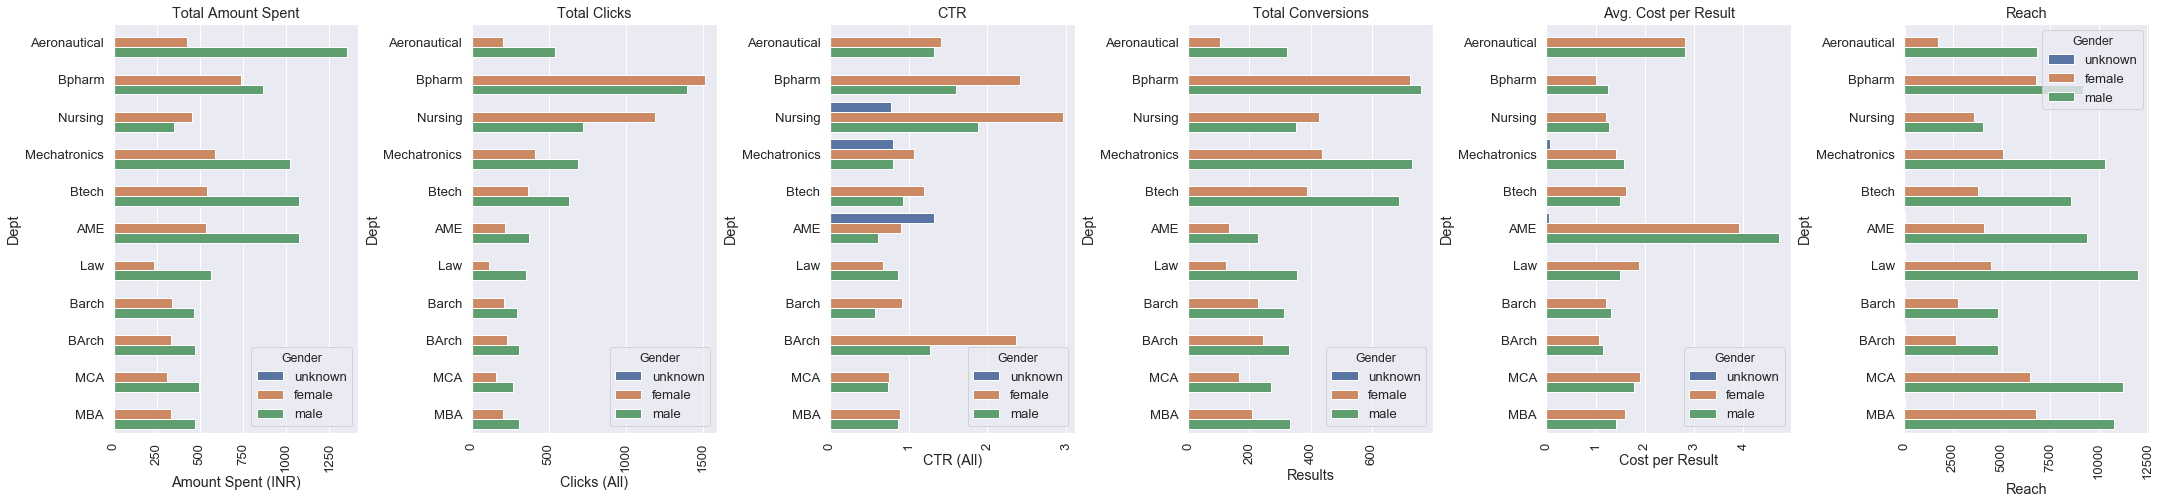

In [34]:
plt.figure(figsize=(30, 7))

# subplot 1
plt.subplot(1, 6, 1)
sns.barplot(y='Dept', x='Amount Spent (INR)',hue='Gender', data=data, estimator=np.sum,ci=None)
plt.title("Total Amount Spent")
plt.xticks(rotation=90)


# subplot 2
plt.subplot(1, 6, 2)
sns.barplot(y='Dept', x='Clicks (All)', hue='Gender', data=data, estimator=np.sum,ci=None)
plt.title("Total Clicks")
plt.xticks(rotation=90)

# subplot 3
plt.subplot(1, 6, 3)
sns.barplot(y='Dept', x='CTR (All)', hue='Gender', data=data, estimator=np.mean,ci=None)
plt.title("CTR")
plt.xticks(rotation=90)

# subplot 4
plt.subplot(1, 6, 4)
sns.barplot(y='Dept', x='Results', hue='Gender', data=data, estimator=np.sum,ci=None)
plt.title("Total Conversions")
plt.xticks(rotation=90)

# subplot 5
plt.subplot(1, 6, 5)
sns.barplot(y='Dept', x='Cost per Result', hue='Gender', data=data, estimator=np.mean,ci=None)
plt.title("Avg. Cost per Result")
plt.xticks(rotation=90)

# subplot 6
plt.subplot(1,6, 6)
sns.barplot(y='Dept', x='Reach', hue='Gender', data=data, estimator=np.mean,ci=None)
plt.title("Reach")
plt.xticks(rotation=90)


plt.tight_layout(pad=0.7)
plt.show()